In [68]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(np.float64(-0.5), np.float64(869.5), np.float64(579.5), np.float64(-0.5))

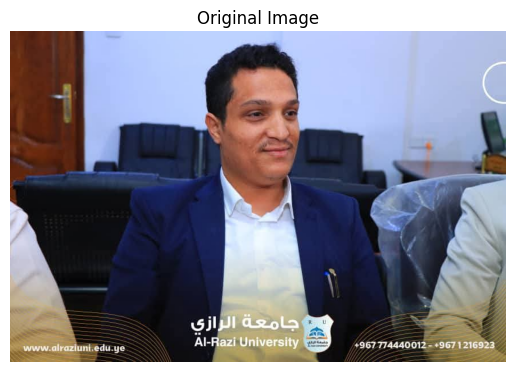

In [ ]:
img_rgb = plt.imread("mm.jpg")
#img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

Gussian Noise

(np.float64(-0.5), np.float64(869.5), np.float64(579.5), np.float64(-0.5))

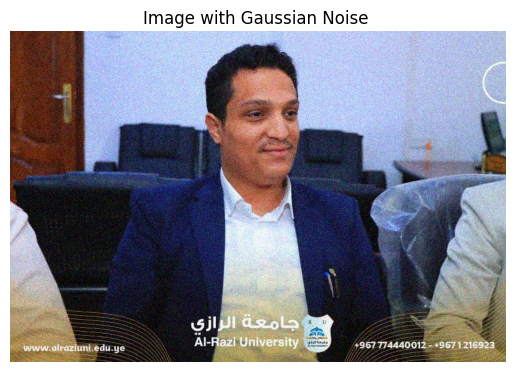

In [70]:
def add_gaussian_noise(image, mean=0, std=20):
    noise = np.random.normal(mean, std, image.shape)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

noisy_img =add_gaussian_noise(img_rgb)

plt.imshow(noisy_img)
plt.title("Image with Gaussian Noise ")
plt.axis("off")

(np.float64(-0.5), np.float64(869.5), np.float64(579.5), np.float64(-0.5))

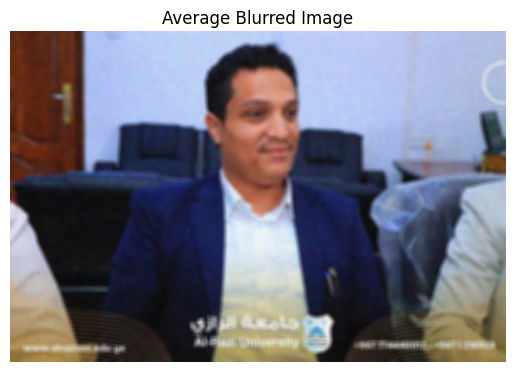

In [71]:
avg = cv2.blur(noisy_img, (9 , 9))

plt.imshow(avg)
plt.title("Average Blurred Image")
plt.axis("off")

(np.float64(-0.5), np.float64(869.5), np.float64(579.5), np.float64(-0.5))

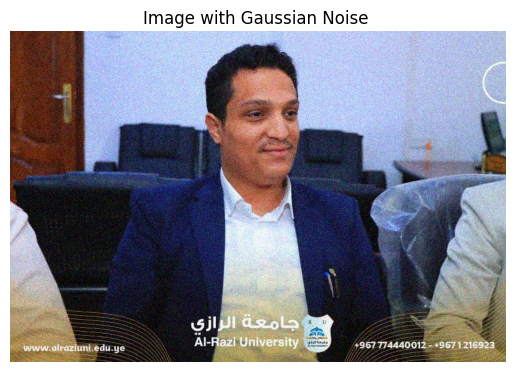

In [72]:
def add_gaussian_noise(image, mean=0, std=15):
    noise = np.random.normal(mean, std, image.shape)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

gaussian_noisy =add_gaussian_noise(img_rgb)

plt.imshow(noisy_img)
plt.title("Image with Gaussian Noise ")
plt.axis("off")

(np.float64(-0.5), np.float64(869.5), np.float64(579.5), np.float64(-0.5))

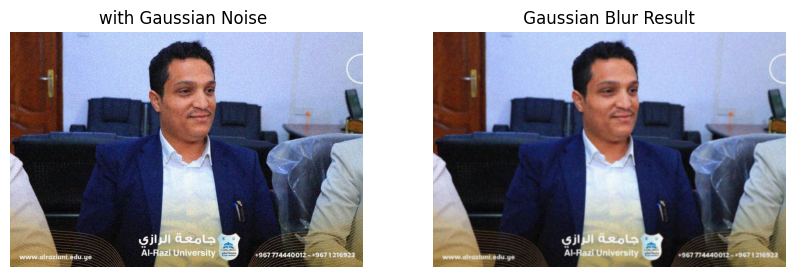

In [73]:
gaussian_denoised =cv2.GaussianBlur(gaussian_noisy, (5,5), 0)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gaussian_noisy)
plt.title("with Gaussian Noise ")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gaussian_denoised)
plt.title(" Gaussian Blur Result ")
plt.axis("off")

Median Filter

(np.float64(-0.5), np.float64(869.5), np.float64(579.5), np.float64(-0.5))

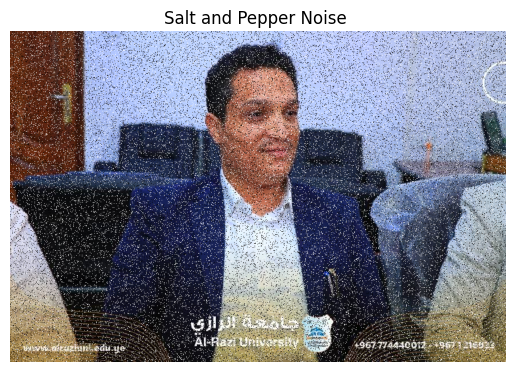

In [74]:
def add_salt_pepper_noise(image, amount=0.07):
    noisy = image.copy()
    h,w,c = noisy.shape
    num_pixels = int(amount * h * w)

    #salt (white)
    for i in range(num_pixels):
        i = np.random.randint(0, h)
        j = np.random.randint(0, w)
        noisy[i,j] = 255

    #Pepper (black)
    for i in range(num_pixels):
        i = np.random.randint(0, h)
        j = np.random.randint(0, w)
        noisy[i,j] = 0

    return noisy
sp_noisy = add_salt_pepper_noise(img_rgb)
plt.imshow(sp_noisy)
plt.title("Salt and Pepper Noise ")
plt.axis("off")

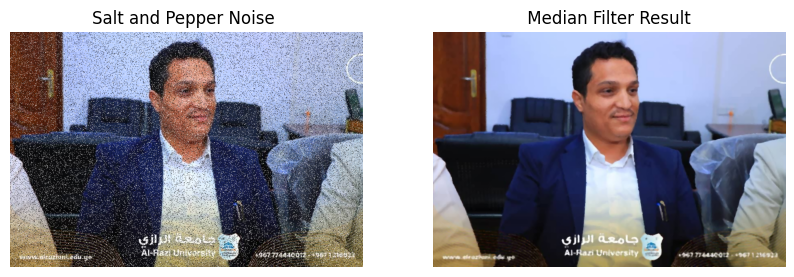

In [75]:
sp_denoised = cv2.medianBlur(sp_noisy, 5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sp_noisy)
plt.title("Salt and Pepper Noise ")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sp_denoised)
plt.title(" Median Filter Result ")
plt.axis("off")

plt.show()

Bilateral Filter


(np.float64(-0.5), np.float64(869.5), np.float64(579.5), np.float64(-0.5))

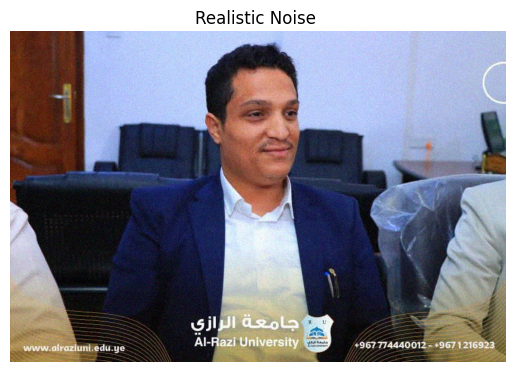

In [76]:
realistic_noisy = add_gaussian_noise(img_rgb,std=10)

plt.imshow(realistic_noisy)
plt.title("Realistic Noise ")
plt.axis("off")


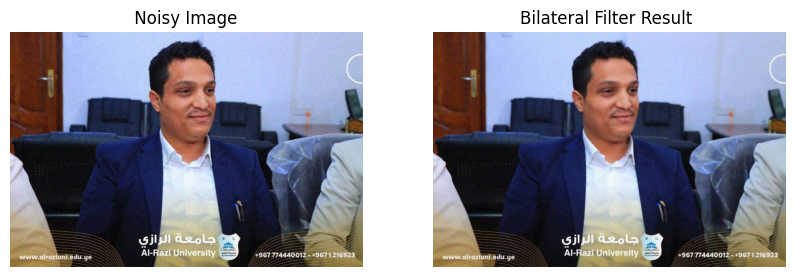

In [77]:
bilateral_denoised = cv2.bilateralFilter(
    realistic_noisy,
    d=5,
    sigmaColor= 75,
    sigmaSpace= 75)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(realistic_noisy)
plt.title(" Noisy Image ")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bilateral_denoised)
plt.title("Bilateral Filter Result ")
plt.axis("off")
plt.show()

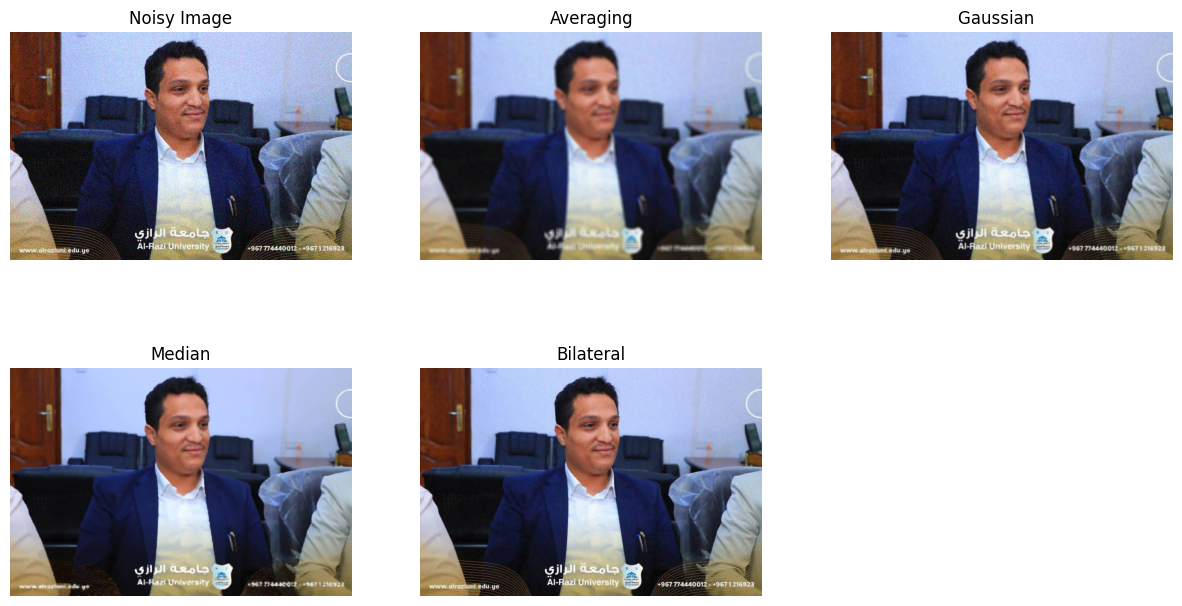

In [81]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(noisy_img)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(avg)
plt.title("Averaging")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(gaussian_denoised)
plt.title("Gaussian  ")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(sp_denoised)
plt.title("Median")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(bilateral_denoised)
plt.title("Bilateral")
plt.axis("off")

plt.show()

Soft Skin Beauty Filter


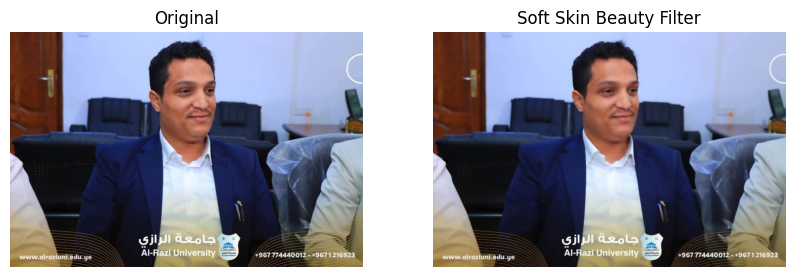

In [82]:
def soft_skin_beauty_filter(image):
    smooth = cv2.bilateralFilter(image, 9, 75, 75)
    result = cv2.addWeighted(image, 0.3, smooth, 0.7, 0)
    return result
beauty = soft_skin_beauty_filter(img_rgb)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(beauty)
plt.title("Soft Skin Beauty Filter")
plt.axis("off")

plt.show()

(np.float64(-0.5), np.float64(317.5), np.float64(158.5), np.float64(-0.5))

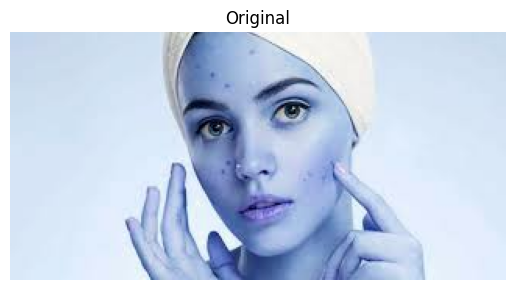

In [95]:
img_rgb = plt.imread("../images/raw/download.jpg")
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

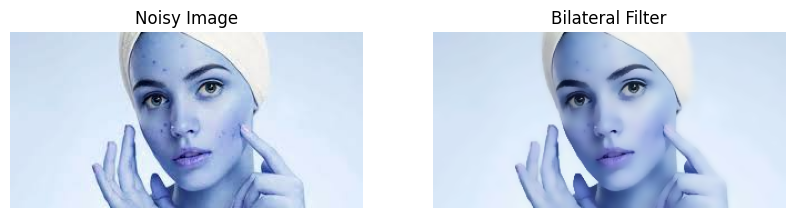

In [96]:
bilateral_denoised=cv2.bilateralFilter(
    img_rgb,
    d=9,
    sigmaColor= 75,
    sigmaSpace= 75
)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bilateral_denoised)
plt.title("Bilateral Filter")
plt.axis("off")

plt.show()

<Figure size 1000x400 with 0 Axes>

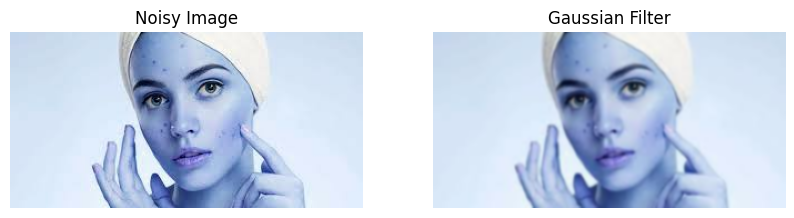

In [98]:
bilateral_denoised=cv2.GaussianBlur(img_rgb, (5, 5), 0)
plt.figure(figsize=(10,4))


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bilateral_denoised)
plt.title("Gaussian Filter")
plt.axis("off")

plt.show()

<Figure size 1000x400 with 0 Axes>

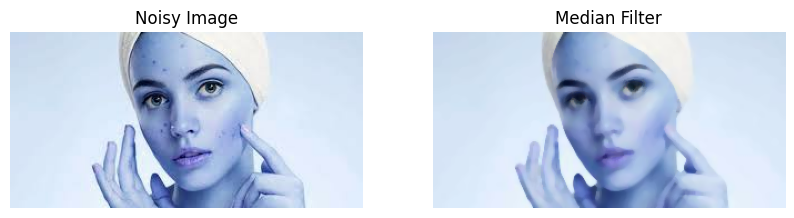

In [100]:
bilateral_denoised=cv2.medianBlur(img_rgb,5)
plt.figure(figsize=(10,4))


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bilateral_denoised)
plt.title("Median Filter")
plt.axis("off")

plt.show()